## Test E-field inside bounded charges

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

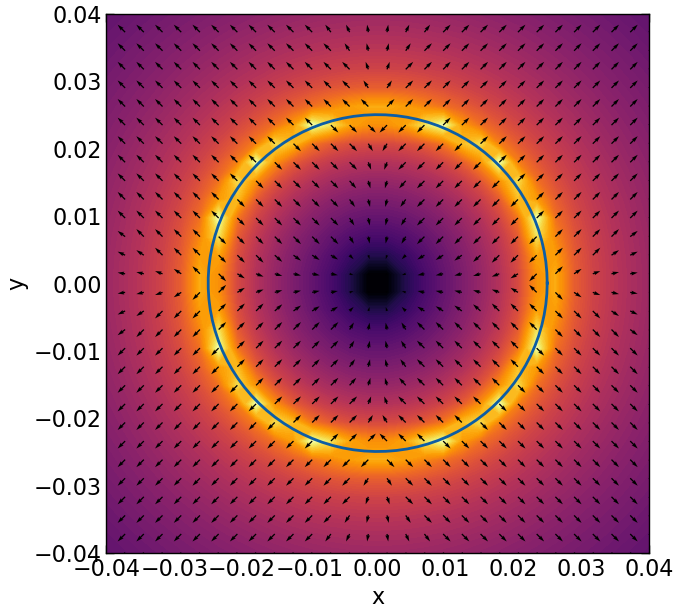

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

#หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

# ความหนาแน่นประจุ
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2.0 * pi * radius)
rho_l

x, y, t = smp.symbols('x y t')
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t), radius * smp.sin(t)])
R = r - rp

dqdt = rho_l * smp.diff(rp, t).norm()

#smp.integrate(dqdt, [t, 0, 2.0 * np.pi])

# หา dEdt
dEdt = dqdt / (4.0 * pi * epsilon_0) * R / R.norm()**3
#dEdt

# Integrate
#smp.integrate(dEdt, [t, 0, 2.0 * np.pi])

#Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * np.pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]
    return np.array([Ex, Ey])

#E(1, 2)

# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2, num_grids=30, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l = 2.5e-2 
x = l * np.cos(t)
y = l * np.sin(t)
plt.plot(x, y)
plt.show()

In [27]:
# ขนาดของสนามไฟฟ้า E บนแนวแกน x

x = np.linspace(-5e-2, 5e-2, 100)
y = np.zeros(len(x))

E_f = np.vectorize(E, signature='(),()->(n)')(x, y)

/var/folders/l3/kvkjl7ln6qjb36yvgbpzxllr0000gn/T/ipykernel_47635/2842714401.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]


In [45]:
E_norm = np.array([np.linalg.norm(E) for E in E_f])

Text(0, 0.5, '$|E(x, 0)|$')

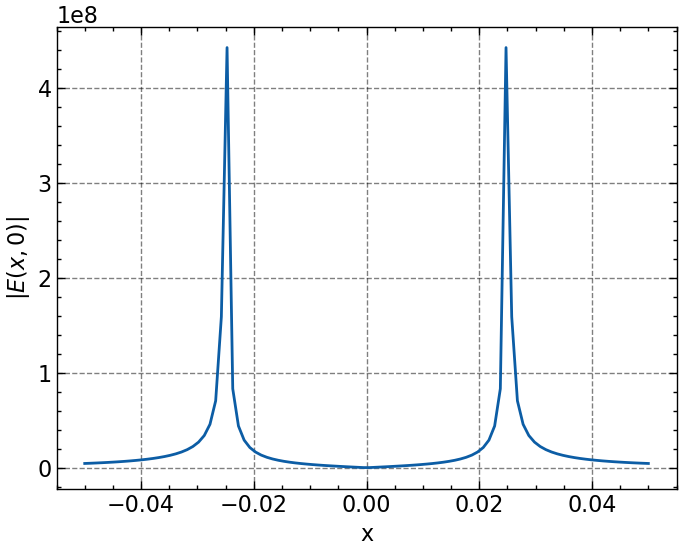

In [47]:
plt.plot(x, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0)|$')

## E-Field inside a hollowed spherical charge

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad

In [35]:
x, y, z = smp.symbols('x, y, z', real=True)
theta, phi = smp.symbols('theta, phi', real=True, pos=True)

radius = 1.0
r = smp.Matrix([x, y, z])
rp = smp.Matrix([radius * smp.sin(theta) * smp.cos(phi),\
                radius * smp.sin(theta) * smp.sin(phi),\
                radius * smp.cos(theta)])
R = r - rp
R

Matrix([
[x - 1.0*sin(theta)*cos(phi)],
[y - 1.0*sin(phi)*sin(theta)],
[         z - 1.0*cos(theta)]])

In [36]:
rho_s = 1.0
dq_dthetadphi = smp.diff(rp, theta).cross(smp.diff(rp, phi)).norm().simplify()
dq_dthetadphi

1.0*Abs(sin(theta))

In [37]:
dE_dthetadphi = dq_dthetadphi / (4.0 * pi * epsilon_0) * R / R.norm()**3
dE_dthetadphi

Matrix([
[8987551792.26117*(x - 1.0*sin(theta)*cos(phi))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)],
[8987551792.26117*(y - 1.0*sin(phi)*sin(theta))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)],
[         8987551792.26117*(z - 1.0*cos(theta))*Abs(sin(theta))/((x - 1.0*sin(theta)*cos(phi))**2 + (y - 1.0*sin(phi)*sin(theta))**2 + (z - 1.0*cos(theta))**2)**(3/2)]])

In [38]:
dExdt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[0])
dEydt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[1])
dEzdt = smp.lambdify([theta, phi, x, y, z], dE_dthetadphi[2])
dEzdt(2.5, 2.0, 1, 2, 3)

264891032.73819578

In [39]:
def E(x, y, z):
    Ex = dblquad(dExdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    Ey = dblquad(dEydt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    Ez = dblquad(dEzdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])

In [40]:
E(1, 2, 3)

array([2.15605193e+09, 4.31210386e+09, 6.46815579e+09])

In [41]:
X = np.linspace(-4, 4, 200)
Y = np.zeros(len(X))
Z = Y

E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

/Users/nayot/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/nayot/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/nayot/anaconda3/lib/python3.11/site-packages/sci

In [42]:
E_field.shape

(200, 3)

In [43]:
E_norm = np.array([np.linalg.norm(E) for E in E_field])

Text(0, 0.5, '$|E(x, 0, 0)|$')

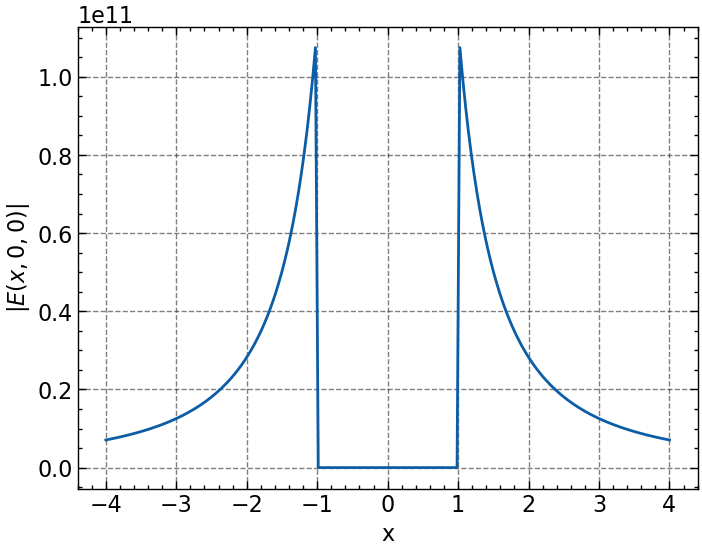

In [25]:
plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

### Plot the field projection on the 2D plane

In [44]:
def E(x, y):
    Ex = dblquad(dExdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    Ey = dblquad(dEydt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    #Ez = dblquad(dEzdt, 0, 2 * pi, lambda a: 0, lambda b: pi, args=(x, y, 0))[0]
    return np.array([Ex, Ey])
E(1, 2)

array([1.01017418e+10, 2.02034836e+10])

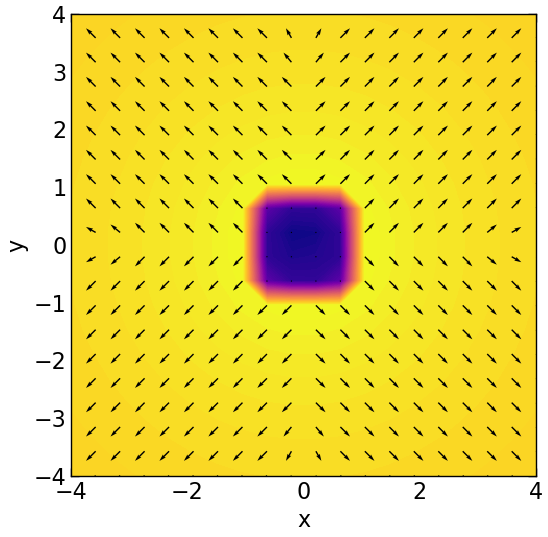

In [45]:
fig = plt.figure(figsize=(6, 6))
ax = field_plot(E, x_min=-4, x_max=4, y_min=-4, y_max=4, contour=True)

### E-Field from a horrowed cylinder

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot, fast_field_plot
import sympy as smp
from scipy.integrate import dblquad

In [15]:
x, y, z, rho, phi, zp, L = smp.symbols("x, y, z, rho, phi, z', L", real=True)

r = smp.Matrix([x, y, z])
rp = smp.Matrix([smp.cos(phi), smp.sin(phi), zp])

R = r - rp
R

Matrix([
[x - cos(phi)],
[y - sin(phi)],
[      z - z']])

In [16]:
smp.diff(rp, phi).cross(smp.diff(rp, zp)).norm().simplify()

1

In [17]:
integrands = R / R.norm()**3
integrands

Matrix([
[(x - cos(phi))/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)],
[(y - sin(phi))/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)],
[      (z - z')/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)]])

In [18]:
integrand_x = smp.lambdify([phi, zp, x, y, z], integrands[0])
integrand_y = smp.lambdify([phi, zp, x, y, z], integrands[1])
integrand_z = smp.lambdify([phi, zp, x, y, z], integrands[2])
integrand_x(1.5, 3, 1, 2, 5)

0.06536463197906121

In [51]:
def E(x, y, z):
    Ex = dblquad(integrand_x, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    Ey = dblquad(integrand_y, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    Ez = dblquad(integrand_z, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])
    
E(1, 2, 3)

array([2.51264444e+00, 5.02528888e+00, 3.76990731e-03])

In [57]:
E(0.5, 0.5, 0)

array([-0.0003141, -0.0003141,  0.       ])

Text(0, 0.5, '$|E(x, 0, 0)|$')

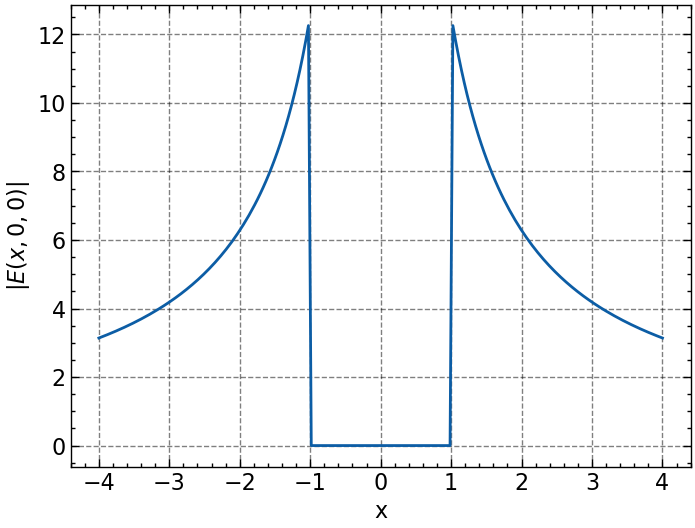

In [64]:
X = np.linspace(-4, 4, 200)
Y = np.zeros(len(X))
Z = 0.00 * np.ones(len(X))

E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

E_norm = np.array([np.linalg.norm(E) for E in E_field])

plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

Text(0, 0.5, '$|E(x, 0, 0)|$')

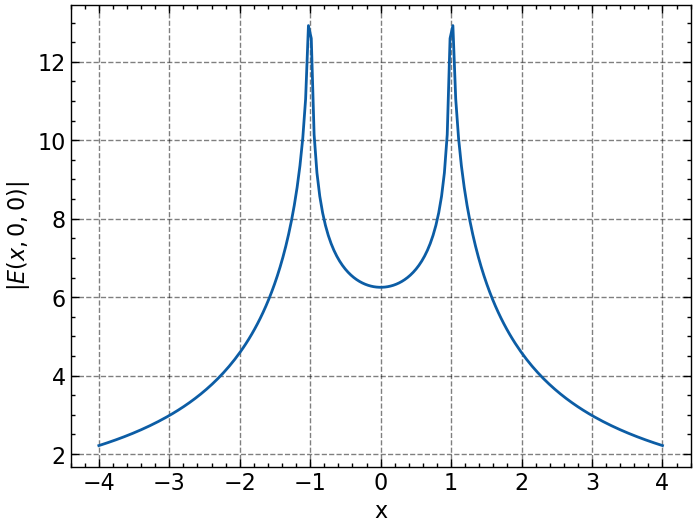

In [65]:
X = np.linspace(-4, 4, 200)
Y = np.zeros(len(X))
Z = 100.0 * np.ones(len(X))

E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

E_norm = np.array([np.linalg.norm(E) for E in E_field])

plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

### E-Field from a coaxial charge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad

In [2]:
x, y, z, rho, phi, zp, L = smp.symbols("x, y, z, rho, phi, z', L", real=True)

r = smp.Matrix([x, y, z])
rp1 = smp.Matrix([smp.cos(phi), smp.sin(phi), zp])
rp2 = smp.Matrix([2 * smp.cos(phi), 2 * smp.sin(phi), zp])

R1 = r - rp1
R2 = r - rp2
R2

Matrix([
[x - 2*cos(phi)],
[y - 2*sin(phi)],
[        z - z']])

In [3]:
rho_s1 = 1 / (2 * pi * 1 * 200)
rho_s2 = -1 / (2 * pi * 2 * 200)

In [4]:
dqdt1 = rho_s1 * smp.diff(rp1, phi).cross(smp.diff(rp1, zp)).norm().simplify()
dqdt2 = rho_s2 * smp.diff(rp2, phi).cross(smp.diff(rp2, zp)).norm().simplify()
dqdt1

0.000795774715459477

In [5]:
dqdt2 

-0.000795774715459477

In [6]:
dEdt1 = R1 / R1.norm()**3
dEdt2 = -R2 / R2.norm()**3
integrands = dEdt1 + dEdt2
integrands

Matrix([
[(-x + 2*cos(phi))/((x - 2*cos(phi))**2 + (y - 2*sin(phi))**2 + (z - z')**2)**(3/2) + (x - cos(phi))/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)],
[(-y + 2*sin(phi))/((x - 2*cos(phi))**2 + (y - 2*sin(phi))**2 + (z - z')**2)**(3/2) + (y - sin(phi))/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)],
[              (-z + z')/((x - 2*cos(phi))**2 + (y - 2*sin(phi))**2 + (z - z')**2)**(3/2) + (z - z')/((x - cos(phi))**2 + (y - sin(phi))**2 + (z - z')**2)**(3/2)]])

In [7]:
integrand_x = smp.lambdify([phi, zp, x, y, z], integrands[0])
integrand_y = smp.lambdify([phi, zp, x, y, z], integrands[1])
integrand_z = smp.lambdify([phi, zp, x, y, z], integrands[2])
integrand_x(1.5, 3, 1, 2, 5)

-0.017904802512858184

In [8]:
def E(x, y, z):
    Ex = dblquad(integrand_x, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    Ey = dblquad(integrand_y, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    Ez = dblquad(integrand_z, -100, 100, lambda zp_a: 0, lambda zp_b: 2 * pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])
    
E(1, 2, 3)

array([-2.84756707e-07, -5.69513461e-07,  1.69623591e-06])

CPU times: user 1min 4s, sys: 35.6 ms, total: 1min 4s
Wall time: 1min 4s


Text(0, 0.5, '$|E(x, 0, 0)|$')

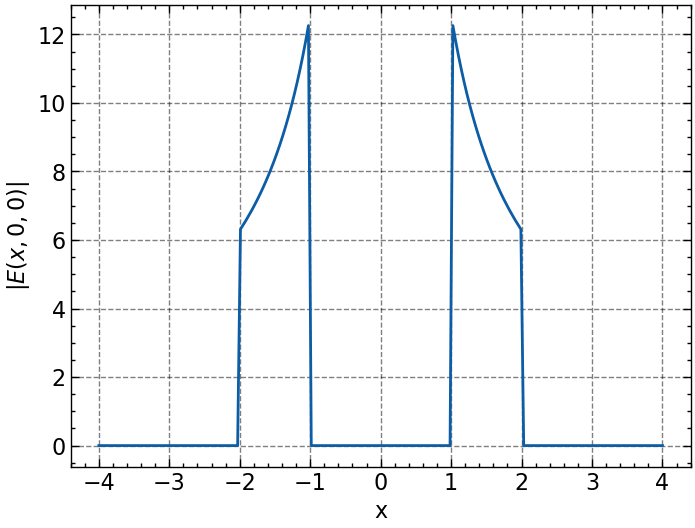

In [17]:
%%time
X = np.linspace(-4, 4, 200)
Y = np.zeros(len(X))
Z = 0.00 * np.ones(len(X))

E_field = np.vectorize(E, signature='(),(),()->(n)')(X, Y, Z)

E_norm = np.array([np.linalg.norm(E) for E in E_field])

plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

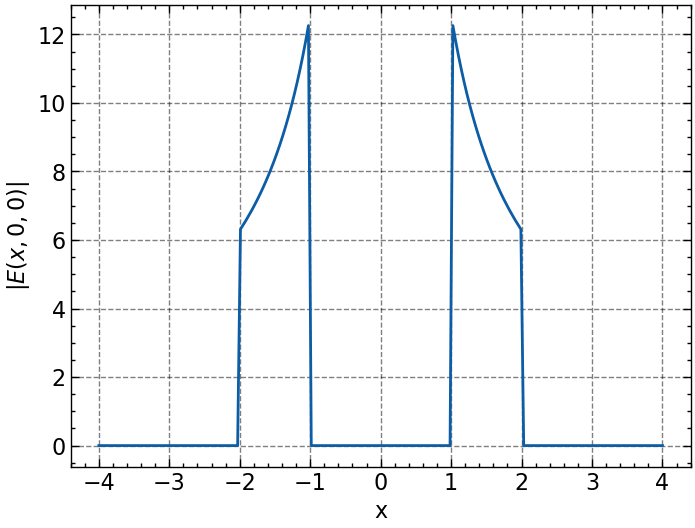

CPU times: user 1min 4s, sys: 40.5 ms, total: 1min 4s
Wall time: 1min 4s


In [26]:
%%time
# Single loop
X = np.linspace(-4, 4, 200)

# Function to vectorize
def compute_E_norm(x, y, z):
    result = E(x, y, z)  # Assuming E returns the electric field vector
    return np.linalg.norm(result)

E_norm = np.array([compute_E_norm(x, 0, 0) for x in X])

# Plotting
plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')
plt.show()

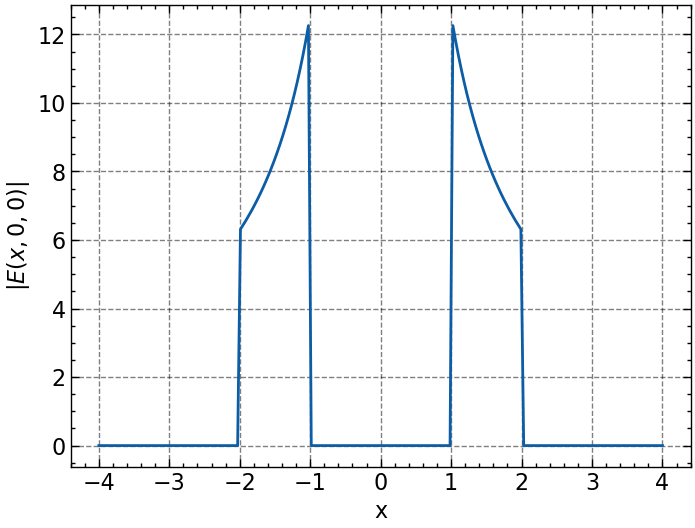

CPU times: user 10.4 s, sys: 925 ms, total: 11.3 s
Wall time: 17.8 s


In [27]:
%%time
# Parallel the processes
from joblib import Parallel, delayed

# Assuming E is your function to compute the electric field
# Ensure it is defined somewhere in your code

# Your initial setup
X = np.linspace(-4, 4, 200)

# Function to vectorize
def compute_E_norm(x, y, z):
    result = E(x, y, z)  # Assuming E returns the electric field vector
    return np.linalg.norm(result)

# Parallel computation of E_norm
E_norm = Parallel(n_jobs=-1)(delayed(compute_E_norm)(x, 0, 0) for x in X)

# Plotting
plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')
plt.show()


CPU times: user 11.8 s, sys: 157 ms, total: 12 s
Wall time: 18.5 s


Text(0, 0.5, '$|E(x, 0, 0)|$')

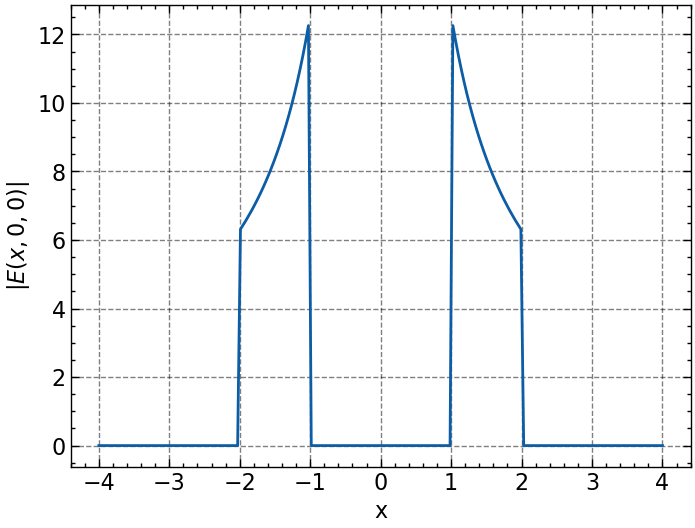

In [31]:
%%time

X = np.linspace(-4, 4, 200)

compute_E_norm = lambda x, y, z: np.linalg.norm(E(x, y, z))

E_norm = Parallel(n_jobs=-1)(delayed(compute_E_norm)(x, 0, 0) for x in X)
plt.plot(X, E_norm)
plt.xlabel('x')
plt.ylabel('$|E(x, 0, 0)|$')

## E-Field due to a ring charge in 3D

In [20]:
x, y, z, phi = smp.symbols('x, y, z, phi', real=True)
r = smp.Matrix([x, y, z])
rp = smp.Matrix([smp.cos(phi),\
                smp.sin(phi),\
                0])
R = r - rp
R

Matrix([
[x - cos(phi)],
[y - sin(phi)],
[           z]])

In [21]:
smp.diff(rp, phi).norm().simplify()

1

In [22]:
integrands = R / R.norm()**3
integrands

Matrix([
[(x - cos(phi))/(z**2 + (x - cos(phi))**2 + (y - sin(phi))**2)**(3/2)],
[(y - sin(phi))/(z**2 + (x - cos(phi))**2 + (y - sin(phi))**2)**(3/2)],
[             z/(z**2 + (x - cos(phi))**2 + (y - sin(phi))**2)**(3/2)]])

In [23]:
integrand_x = smp.lambdify([phi, x, y, z], integrands[0])
integrand_y = smp.lambdify([phi, x, y, z], integrands[1])
integrand_z = smp.lambdify([phi, x, y, z], integrands[2])

def E(x, y, z):
    Ex = quad(integrand_x, 0, 2.0 * np.pi, args=(x, y, z))[0]
    Ey = quad(integrand_y, 0, 2.0 * np.pi, args=(x, y, z))[0]
    Ez = quad(integrand_z, 0, 2.0 * np.pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])

E(0, 0.5, 1)

array([7.48459401e-17, 3.56137753e-01, 2.28984897e+00])

CPU times: user 306 ms, sys: 8.33 ms, total: 315 ms
Wall time: 310 ms


Text(0, 0.5, 'z')

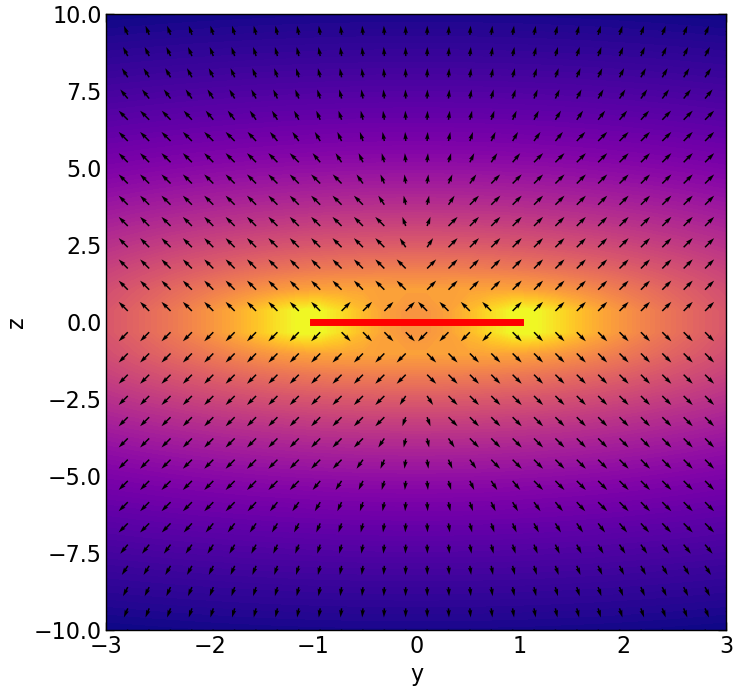

In [29]:
%%time
def E2DYZ(y, z):
    return E(0.0, y, z)[-2:]

fig = plt.figure(figsize=(8, 8))
ax = field_plot(E2DYZ, x_min=-3, x_max=3, y_min=-10, y_max=10, num_grids=30, contour=True)

X = np.linspace(-1, 1, 100)
Y = np.zeros(len(X))
ax.plot(X, Y, color='r', linewidth=5)
ax.set_xlabel('y')
ax.set_ylabel('z')

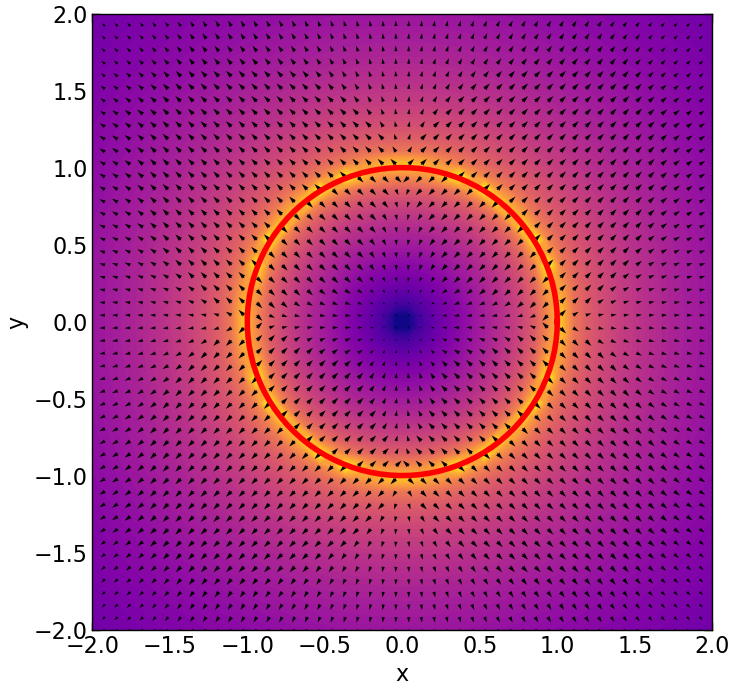

In [30]:
def E2DXY(x, y):
    return E(x, y, 0)[:2]

fig = plt.figure(figsize=(8, 8))
ax = field_plot(E2DXY, x_min=-2, x_max=2, y_min=-2, y_max=2, num_grids=50, contour=True)

t = np.linspace(0, 2 * pi, 100)
X = np.cos(t)
Y = np.sin(t)
ax.plot(X, Y, color='r', linewidth=4)
